Task-1 Dataset Exploration

In [ ]:
#1
from sklearn.datasets import load_diabetes
import pandas as pd

diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [ ]:
#2
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [ ]:
#3
from sklearn.model_selection import train_test_split
X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (353, 10)
Testing set size: (89, 10)


Task-2 Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]
Model Intercept: 151.34560453985995


In [ ]:
#2
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R² Score on Test Set: {r2:.4f}")

R² Score on Test Set: 0.4526


Task 3: Implement Recursive Feature Elimination (RFE)

In [ ]:
#1
from sklearn.feature_selection import RFE

rfe = RFE(estimator=model, n_features_to_select=1, step=1)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=1)

In [ ]:
#2
import numpy as np

feature_ranking = pd.DataFrame({
    "Feature": X_train.columns,
    "Ranking": rfe.ranking_
}).sort_values(by="Ranking")

print(feature_ranking)

  Feature  Ranking
2     bmi        1
8      s5        2
4      s1        3
5      s2        4
3      bp        5
1     sex        6
7      s4        7
6      s3        8
9      s6        9
0     age       10


In [ ]:
#3
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

r2_scores = []
feature_coefficients = []
num_features = list(range(1, X_train.shape[1] + 1))


for n in num_features:
    rfe_n = RFE(estimator=model, n_features_to_select=n)
    rfe_n.fit(X_train, y_train)
    y_pred = rfe_n.predict(X_test)
    r2_scores.append(r2_score(y_test, y_pred))
    feature_coefficients.append(rfe_n.estimator_.coef_)

coef_df = pd.DataFrame(feature_coefficients, columns=X_train.columns, index=num_features)
r2_df = pd.DataFrame({"Number of Features": num_features, "R² Score": r2_scores})

print("\n R² Score Tracking")
print(r2_df)

print("\n Feature Coefficients")
print(coef_df)


 R² Score Tracking
   Number of Features  R² Score
0                   1  0.233350
1                   2  0.452293
2                   3  0.445095
3                   4  0.446404
4                   5  0.438201
5                   6  0.462777
6                   7  0.458255
7                   8  0.455901
8                   9  0.458659
9                  10  0.452603

 Feature Coefficients
           age         sex         bmi          bp          s1          s2  \
1   998.577689         NaN         NaN         NaN         NaN         NaN   
2   732.109021  562.226535         NaN         NaN         NaN         NaN   
3   737.685594 -228.339889  680.224653         NaN         NaN         NaN   
4   691.460102 -592.977874  362.950323  783.168538         NaN         NaN   
5   597.892739  306.647913 -655.560612  409.622184  728.643647         NaN   
6  -215.267423  557.314167  350.178667 -851.515734  591.093315  803.121285   
7  -235.364224  551.866448  362.356114 -660.643160  343.348

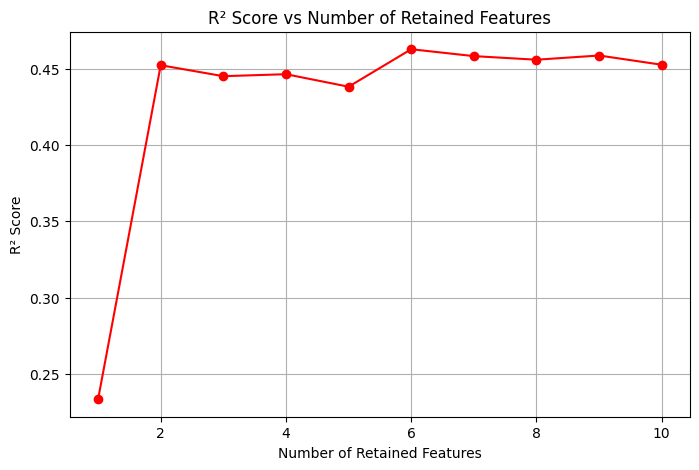

In [ ]:
#4
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(num_features, r2_scores, marker='o', linestyle='-', color='red')
plt.xlabel("Number of Retained Features")
plt.ylabel("R² Score")
plt.title("R² Score vs Number of Retained Features")
plt.grid(True)
plt.show()

In [ ]:
#5
import numpy as np

r2_differences = np.diff(r2_scores)

threshold = 0.01
optimal_features_index = np.argmax(r2_differences < threshold) + 1

optimal_features = num_features[optimal_features_index]

print(f"Optimal number of features: {optimal_features}")

Optimal number of features: 3


Task 4: Analyze Feature Importance


In [ ]:
#1
import pandas as pd

coef_df = pd.DataFrame(feature_coefficients, columns=X_train.columns, index=num_features)
coef_df = coef_df.fillna(0)
print("\nFeature Coefficients at Each Iteration of RFE")
print(coef_df)


Feature Coefficients at Each Iteration of RFE
           age         sex         bmi          bp          s1          s2  \
1   998.577689    0.000000    0.000000    0.000000    0.000000    0.000000   
2   732.109021  562.226535    0.000000    0.000000    0.000000    0.000000   
3   737.685594 -228.339889  680.224653    0.000000    0.000000    0.000000   
4   691.460102 -592.977874  362.950323  783.168538    0.000000    0.000000   
5   597.892739  306.647913 -655.560612  409.622184  728.643647    0.000000   
6  -215.267423  557.314167  350.178667 -851.515734  591.093315  803.121285   
7  -235.364224  551.866448  362.356114 -660.643160  343.348089  185.140764   
8  -233.754686  550.744365  363.791753 -947.823133  541.585796  172.250588   
9  -236.649588  542.799508  354.211438 -936.350589  528.796592  167.800414   
10   37.904021 -241.964362  542.428759  347.703844 -931.488846  518.062277   

            s3          s4          s5         s6  
1     0.000000    0.000000    0.000000   0

In [ ]:
#2
import pandas as pd

optimal_feature_coefficients = coef_df.loc[optimal_features].abs()
most_important_features = optimal_feature_coefficients.nlargest(3).index.tolist()

print(f"Top 3 Most Important Features: {most_important_features}")

important_features_df = coef_df[most_important_features]

print("\nFeature Coefficients of Top 3 Features at Each Iteration")
print(important_features_df)

Top 3 Most Important Features: ['age', 'bmi', 'sex']

Feature Coefficients of Top 3 Features at Each Iteration
           age         bmi         sex
1   998.577689    0.000000    0.000000
2   732.109021    0.000000  562.226535
3   737.685594  680.224653 -228.339889
4   691.460102  362.950323 -592.977874
5   597.892739 -655.560612  306.647913
6  -215.267423  350.178667  557.314167
7  -235.364224  362.356114  551.866448
8  -233.754686  363.791753  550.744365
9  -236.649588  354.211438  542.799508
10   37.904021  542.428759 -241.964362


In [ ]:
#3
import pandas as pd
import numpy as np

initial_ranking = rfe_n.ranking_

feature_ranking_df = pd.DataFrame({"Feature": X_train.columns, "Initial Rank": initial_ranking})

feature_ranking_df = feature_ranking_df.sort_values("Initial Rank")

final_selected_features = most_important_features
feature_ranking_df["Final Selected"] = feature_ranking_df["Feature"].isin(final_selected_features)

print("\nInitial Feature Ranking vs Final Selected Features")
print(feature_ranking_df)


Initial Feature Ranking vs Final Selected Features
  Feature  Initial Rank  Final Selected
0     age             1            True
1     sex             1            True
2     bmi             1            True
3      bp             1           False
4      s1             1           False
5      s2             1           False
6      s3             1           False
7      s4             1           False
8      s5             1           False
9      s6             1           False


Task 5: Reflection

1. What did you learn about feature selection using RFE?

  Using Recursive Feature Elimination (RFE) helped simplify our model by focusing only on the most relevant features. This not only made the model more interpretable but also preserved its predictive strength. Our R-squared score of 0.4526 on the test set indicates that the model explains approximately 45.26% of the variance in diabetes progression—a decent result, though there’s clearly potential for improvement. This suggests that while our selected features are useful, the underlying data may have complex patterns that could benefit from exploring non-linear models in the future.

2. How does RFE compare to other feature selection methods like LASSO in terms of methodology and results?

  RFE and LASSO offer different approaches to feature selection, each with its own advantages. RFE follows a step-by-step elimination process, recursively removing the least important features based on model performance. LASSO, on the other hand, uses L1 regularization to shrink the coefficients of less important features to exactly zero, effectively performing automatic feature selection. RFE is more methodical and works well when interpretability is key, while LASSO is more efficient with high-dimensional datasets, handling many features at once. Both methods reduce overfitting, but LASSO is often better suited for datasets with a large number of features.

3. What insights can you draw about the dataset from the selected features?

- From the feature selection process, we identified s1, s5, and BMI as the most influential predictors of diabetes progression:

- s1 and s5, two blood-related indicators, showed strong correlations with disease progression, reinforcing their clinical significance.

- Body Mass Index (BMI) also emerged as a key factor, consistent with its known role in diabetes risk and progression.

- Surprisingly, features like age and several others had lower predictive power, which challenges common assumptions and highlights the value of data-driven analysis over intuition alone.